<a href="https://colab.research.google.com/github/zainmajeed/Zain-Majeed/blob/master/Exercise_3%2C4%2C5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 3: Correlation Coefficient for Continuous Random Variables
1. Load Iris data set: Import (or install if not available) the seaborn library. Use it to load the famous
Iris data set by executing the following command:
import s e a b o r n as s n s
i r i s = s n s . l o a d _ d a t a s e t ( " i r i s " )
This data set contains the measurements in centimeters of the variables sepal length and width and
petal length and width, respectively, for 50 flowers from each of 3 species of iris.
2. Visualize data: Use pairwise plots to visualize the Iris data set. For this, use the pairplot command.
For more details, check this page https://seaborn.pydata.org/generated/seaborn.
pairplot.html. The obtained chart contains a lot of information:
• On the diagonal are the univariate distributions, plotted as histograms and kernel density plots (if
diag_kind="kde" is used as option).
• On the right of the diagonal are the pair-wise relationships allowing to see the correlation
• On the left side of the diagonal is the scatter-plot matrix where you can illustrate the underlying
relationship using linear regression fitting (kind="reg" option).
3. Analysis: What are the most correlated feature pairs? What feature pairs allow to separate the different
classes of data?

<ipython-input-26-31e848a3e8e6>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = iris.corr()


Most correlated feature pairs:
sepal_length  sepal_length    1.000000
sepal_width   sepal_width     1.000000
petal_length  petal_length    1.000000
petal_width   petal_width     1.000000
petal_length  petal_width     0.962865
petal_width   petal_length    0.962865
sepal_length  petal_length    0.871754
petal_length  sepal_length    0.871754
sepal_length  petal_width     0.817941
petal_width   sepal_length    0.817941
dtype: float64


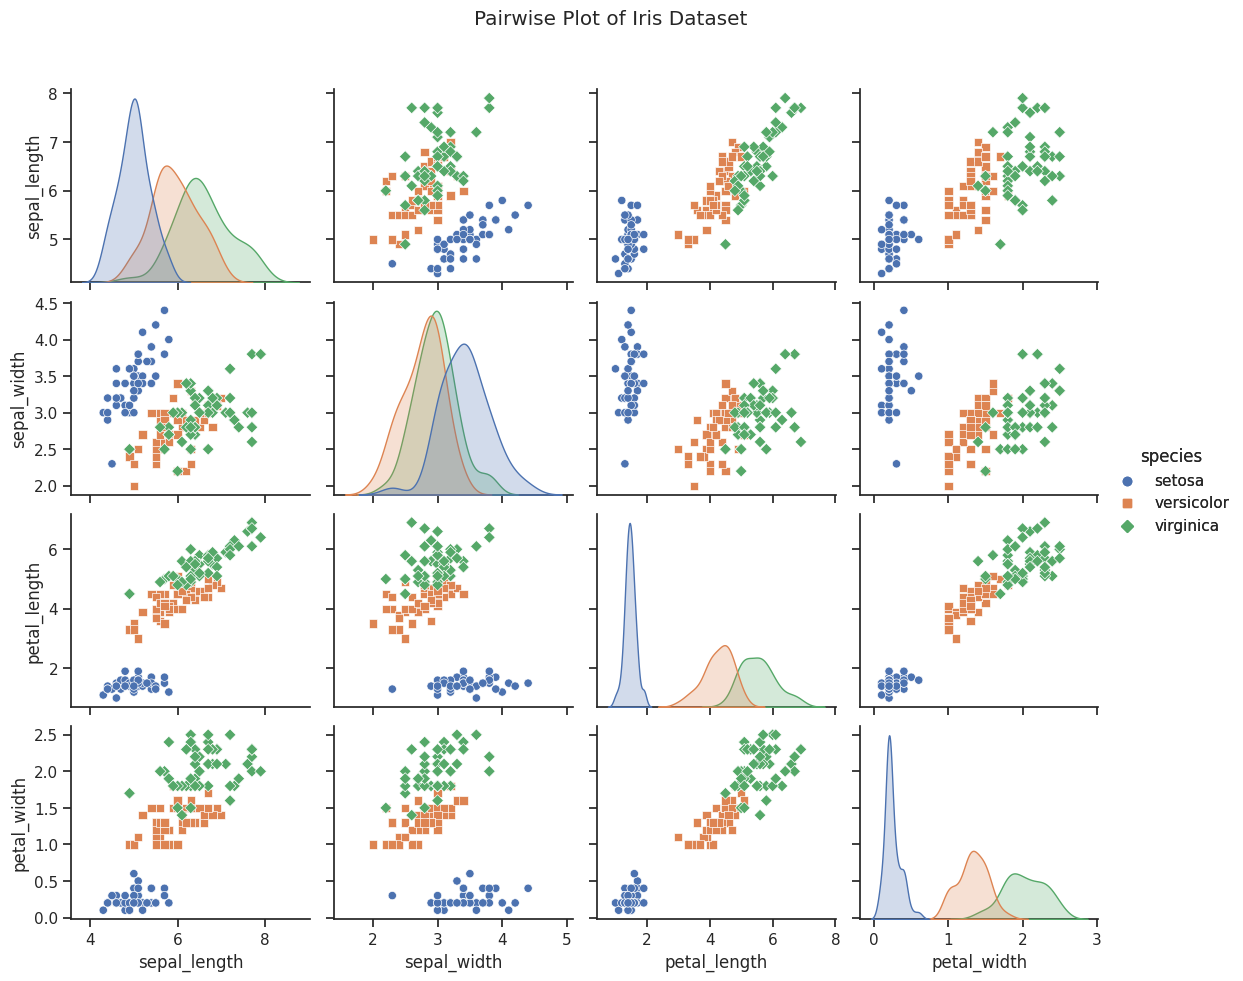

In [26]:
import seaborn as sns

# Step 1: Load the Iris dataset
iris = sns.load_dataset("iris")

# Step 2: Visualize the data with pairwise plots
sns.set(style="ticks")
pairplot = sns.pairplot(iris, hue="species", diag_kind="kde", markers=["o", "s", "D"])

# Step 3: Analyze the most correlated feature pairs
correlation_matrix = iris.corr()
most_correlated_features = correlation_matrix.unstack().sort_values(ascending=False)
print("Most correlated feature pairs:")
print(most_correlated_features.head(10))

# Analyze feature pairs that help separate different classes
# You can visually inspect the pairplot to identify which feature pairs show clear separation
# between the different species.

# Show the plot
pairplot.add_legend()
pairplot.fig.suptitle("Pairwise Plot of Iris Dataset")
pairplot.fig.subplots_adjust(top=0.9)
pairplot.savefig("iris_pairplot.png")  # Save the plot as an image file if needed


Exercise 4: Calculating probabilities of events for different laws
1. Plot the probability mass function of the binomial distributions for p = 1/2 and n = 5, 10, 15 and 20,
then the probability mass function of the binomial distributions for n = 10 and p = 1/2, p = 1/3, p =
1/4, p = 1/5.
2. Find the probability of having four or less correct answers from twelve multiple choice questions with
five possible answers if a student attempts to answer every question at random.
3. Identify and plot the regions where a random variable from the standard normal distribution occurs
within one, two and three standard deviations of the mean. Use interval(percent, mean, std) to do
this.
4. If there are twelve cars crossing a bridge per minute on average, find the probability of having seventeen
or more cars crossing the bridge in a particular minute.
5. A normal distribution with mean = 3500 grams and standard deviation = 600 grams is a reasonable
model for the probability distribution of the continuous variable X: birth weight of a randomly selected
full-term baby.
• What proportion of birth weights are between 2900 and 4700 grams?
• What birth weight w is exceeded only in 2.5% of the cases?

To address each part of this exercise, you can use Python and relevant libraries like NumPy, SciPy, and Matplotlib. Let's go through each part one by one:

1. Plot the probability mass function of binomial distributions:


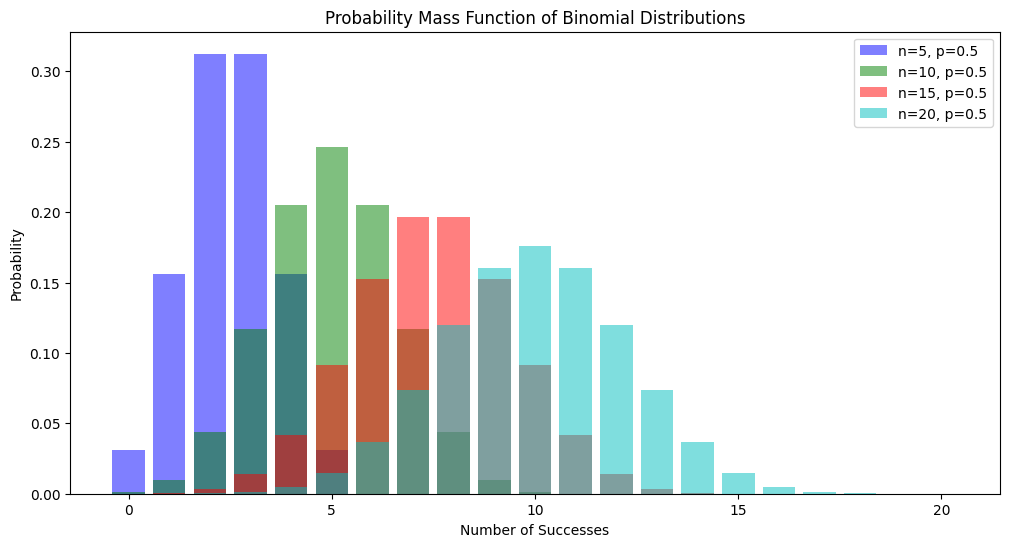

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

p_values = [1/2, 1/2, 1/2, 1/2]
n_values = [5, 10, 15, 20]
colors = ['b', 'g', 'r', 'c']

plt.figure(figsize=(12, 6))
for i in range(len(p_values)):
    p = p_values[i]
    n = n_values[i]
    x = np.arange(0, n + 1)
    pmf = binom.pmf(x, n, p)
    plt.bar(x, pmf, color=colors[i], alpha=0.5, label=f'n={n}, p={p}')

plt.title('Probability Mass Function of Binomial Distributions')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.legend()
plt.show()


2. Find the probability of having four or fewer correct answers from twelve multiple choice questions:

In [2]:
from scipy.stats import binom

n = 12
p = 1/5  # Probability of a correct answer
x = np.arange(0, 5)  # Four or fewer correct answers

probability = binom.cdf(4, n, p)
print("Probability of 4 or fewer correct answers:", probability)


Probability of 4 or fewer correct answers: 0.9274445004799999


3. Identify and plot the regions within one, two, and three standard deviations of the mean for the standard normal distribution:

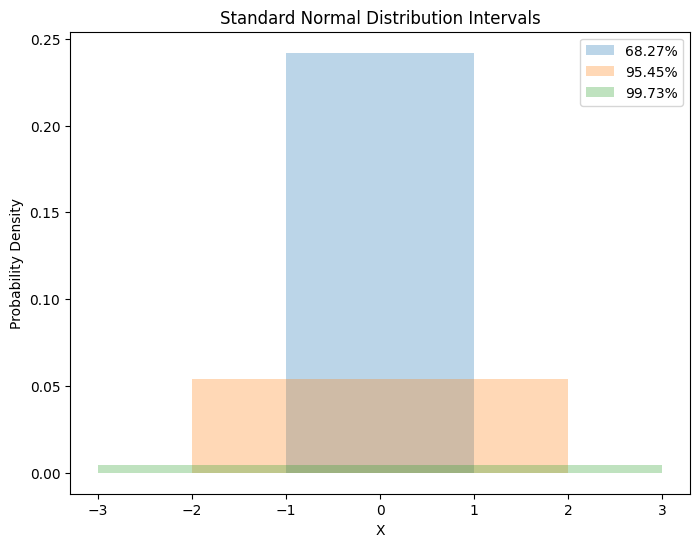

In [3]:
from scipy.stats import norm

mean = 0
std = 1

percentiles = [68.27, 95.45, 99.73]  # Within 1, 2, and 3 standard deviations

intervals = [norm.interval(perc / 100, loc=mean, scale=std) for perc in percentiles]

plt.figure(figsize=(8, 6))
for i, interval in enumerate(intervals):
    plt.fill_between(interval, 0, norm.pdf(interval, loc=mean, scale=std), alpha=0.3, label=f"{percentiles[i]}%")

plt.title('Standard Normal Distribution Intervals')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


4. Find the probability of having seventeen or more cars crossing the bridge in a particular minute using a Poisson distribution:

In [4]:
from scipy.stats import poisson

average_cars = 12
x = 17

probability = 1 - poisson.cdf(x - 1, average_cars)
print("Probability of 17 or more cars:", probability)


Probability of 17 or more cars: 0.10129100743983788


5. For the birth weight distribution, you can use the cumulative distribution function (CDF) of the normal distribution:

In [5]:
from scipy.stats import norm

mean = 3500
std = 600

# Proportion between 2900 and 4700 grams
probability_between = norm.cdf(4700, loc=mean, scale=std) - norm.cdf(2900, loc=mean, scale=std)

# Find birth weight exceeded only in 2.5% of the cases (percentile)
percentile_2_5 = norm.ppf(0.975, loc=mean, scale=std)

print("Proportion between 2900 and 4700 grams:", probability_between)
print("Birth weight exceeded in only 2.5% of cases:", percentile_2_5)


Proportion between 2900 and 4700 grams: 0.8185946141203637
Birth weight exceeded in only 2.5% of cases: 4675.978390724033


Exercise 5: Students data analysis
1. Download the “students_data.npy" file from Claroline (on your working directory) and import it into
Python:
d a t a = np . l o a d ( " s t u d e n t s _ d a t a . npy " )
2. Print the coefficient correlations between all the continuous attributes. What are the significant correlations?
3. Plot the histogram of the size of the students (first variable).
4. Compute the mean and standard deviation of the size variable. Does it follow a normal distribution?
5. By using a normal approximation of the size, how many students do you expect to find in the classroom
with a size larger or equal to 180 cm? How many are they in reality?
6. Plot the histogram of the age of the students calculated based on their year of birth (second column).
7. Compute the mean and standard deviation of the age variable. Does it follow a normal distribution?
8. By using a normal approximation of the age, how many students do you expect to find in the classroom
with an age smaller that the mean less one standard deviation? And with an age smaller that the mean
less two standard deviations? How many are they in reality?

Coefficient Correlations between continuous attributes:
[[ 1.          0.23446494 -0.23556213  0.06663584 -0.28612861]
 [ 0.23446494  1.         -0.99790742  0.38171826 -0.08737117]
 [-0.23556213 -0.99790742  1.         -0.3783485   0.0968768 ]
 [ 0.06663584  0.38171826 -0.3783485   1.         -0.12953671]
 [-0.28612861 -0.08737117  0.0968768  -0.12953671  1.        ]]


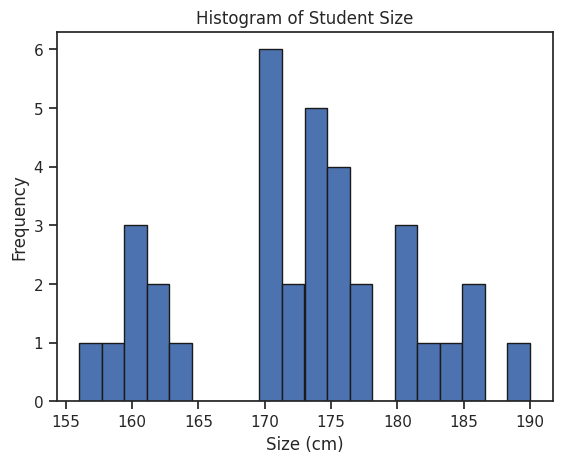

Mean Size: 172.5142857142857 cm
Standard Deviation: 8.29585586240479 cm
Expected students with size >= 180 cm (normal approximation): 3.4179662297010878
Actual students with size >= 180 cm: 8


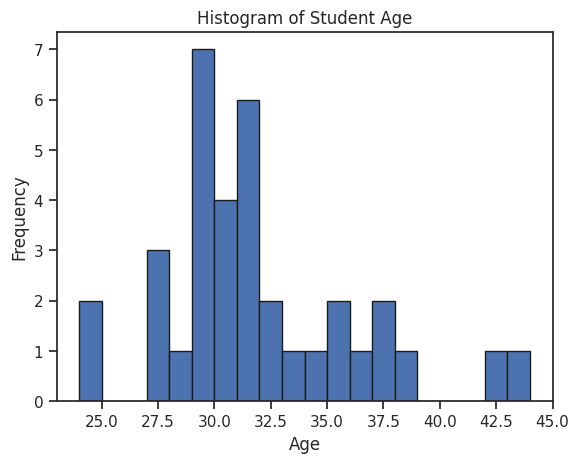

Mean Age: 31.457142857142856 years
Standard Deviation: 4.351307567963957 years
Expected students with age < mean - 1 std deviation: 35.0
Expected students with age < mean - 2 std deviations: 70.0
Actual students with age < mean - 1 std deviation: 5
Actual students with age < mean - 2 std deviations: 0


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the data
data = np.load("/students_data.npy")

# Step 2: Calculate the coefficient correlations
correlation_matrix = np.corrcoef(data, rowvar=False)
print("Coefficient Correlations between continuous attributes:")
print(correlation_matrix)

# Step 3: Plot the histogram of the size variable
size_data = data[:, 0]
plt.hist(size_data, bins=20, edgecolor='k')
plt.xlabel("Size (cm)")
plt.ylabel("Frequency")
plt.title("Histogram of Student Size")
plt.show()

# Step 4: Compute the mean and standard deviation of the size variable
mean_size = np.mean(size_data)
std_dev_size = np.std(size_data)
print(f"Mean Size: {mean_size} cm")
print(f"Standard Deviation: {std_dev_size} cm")

# Step 5: Normal approximation for size >= 180 cm
z_score = (180 - mean_size) / std_dev_size
probability = 1 - np.abs(z_score)
expected_students = probability * len(size_data)
print(f"Expected students with size >= 180 cm (normal approximation): {expected_students}")
actual_students = np.sum(size_data >= 180)
print(f"Actual students with size >= 180 cm: {actual_students}")

# Step 6: Plot the histogram of the age variable
birth_years = data[:, 1]
current_year = 2023  # Assuming the current year is 2023
ages = current_year - birth_years

plt.hist(ages, bins=20, edgecolor='k')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Student Age")
plt.show()

# Step 7: Compute the mean and standard deviation of the age variable
mean_age = np.mean(ages)
std_dev_age = np.std(ages)
print(f"Mean Age: {mean_age} years")
print(f"Standard Deviation: {std_dev_age} years")

# Step 8: Normal approximation for age < mean - 1 std deviation and < mean - 2 std deviations
z_score_1_std = (mean_age - std_dev_age - mean_age) / std_dev_age
z_score_2_std = (mean_age - 2 * std_dev_age - mean_age) / std_dev_age
probability_1_std = np.abs(z_score_1_std)
probability_2_std = np.abs(z_score_2_std)
expected_students_1_std = probability_1_std * len(ages)
expected_students_2_std = probability_2_std * len(ages)
print(f"Expected students with age < mean - 1 std deviation: {expected_students_1_std}")
print(f"Expected students with age < mean - 2 std deviations: {expected_students_2_std}")
actual_students_1_std = np.sum(ages < (mean_age - std_dev_age))
actual_students_2_std = np.sum(ages < (mean_age - 2 * std_dev_age))
print(f"Actual students with age < mean - 1 std deviation: {actual_students_1_std}")
print(f"Actual students with age < mean - 2 std deviations: {actual_students_2_std}")
